# Sales Forcasting problem

In [2]:
!pip install xgboost seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 822.7 kB/s eta 0:00:00a 0:00:01


In [109]:
import seaborn as sns
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
col_palete = sns.color_palette()
plt.style.use('fivethirtyeight')

In [197]:
df = pd.read_csv('archive (2)/PJME_hourly.csv')
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [198]:
df.tail()
df.set_index("Datetime",inplace=True)
df.index = pd.to_datetime(df.index)

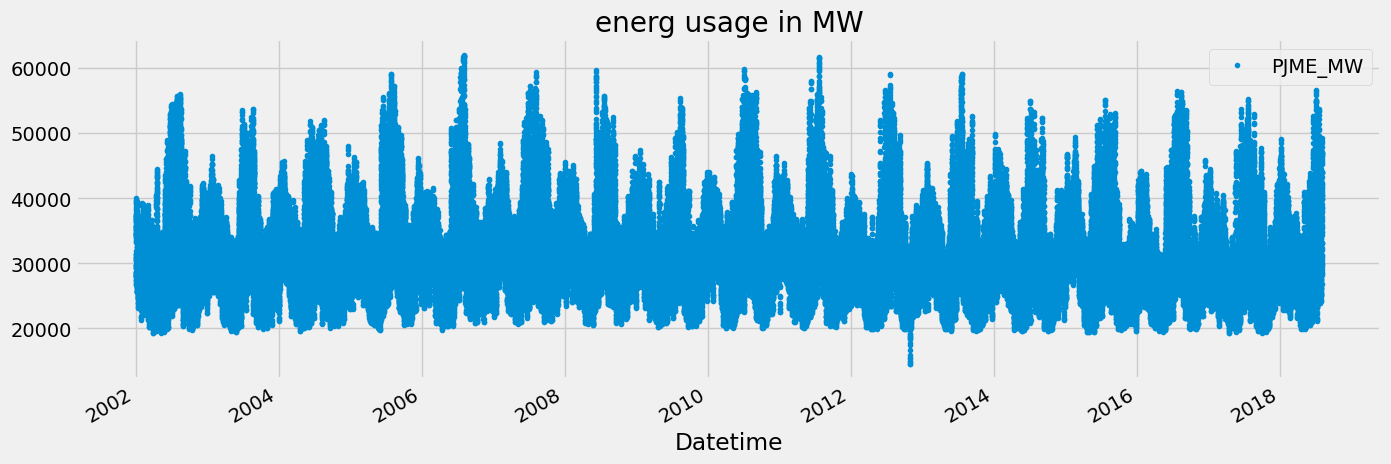

In [199]:
df.plot(style='.',figsize=(15,5),color = col_palete[0],title="energ usage in MW")
plt.show()

# Train Test split

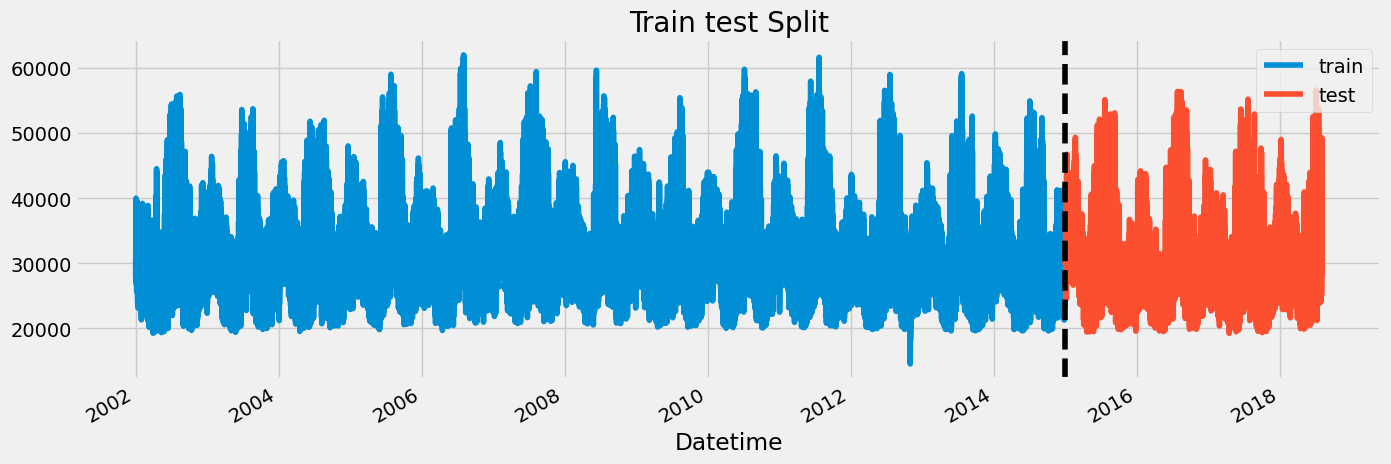

In [92]:
train = df.loc[df.index < '2015-01-01']
test = df.loc[df.index >= '2015-01-01']
fig,ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax,label="train",title = 'Train test Split')
test.plot(ax=ax,label="test")
ax.axvline('2015-01-01',color='black', ls='--')
ax.legend(["train","test"]) 
plt.show()

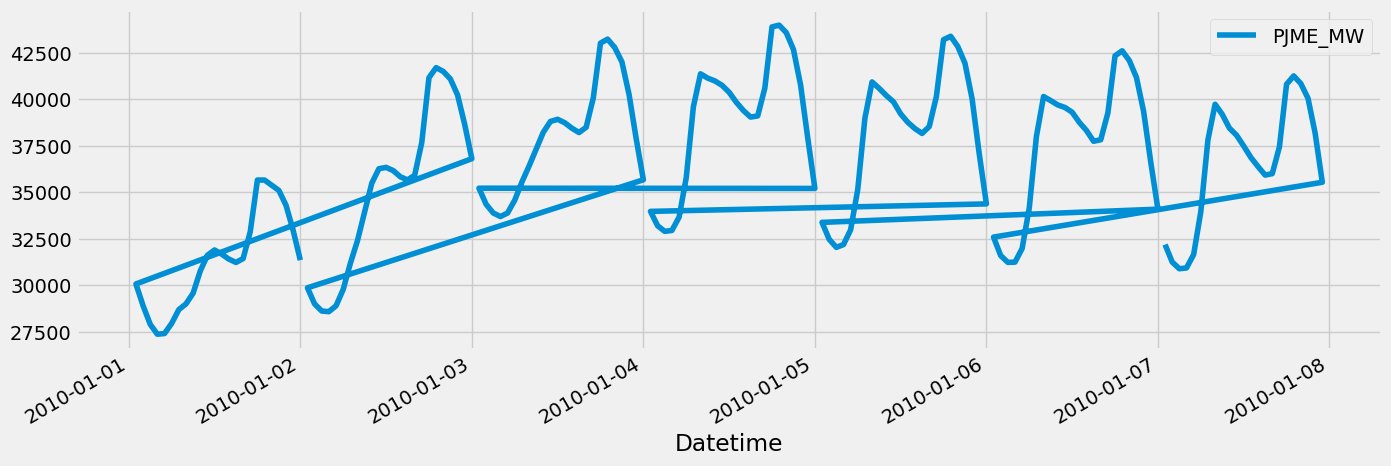

In [90]:
df.loc[(df.index > '2010-01-01') & (df.index < '2010-01-08')].plot(figsize=(15,5),label="weekly data plot")
plt.show()

# Feature Creation

In [117]:
def createfeatures(df):
    df = df.copy()
    df['hours']=df.index.hour
    df['dayoftheweek']=df.index.day_of_week
    df['month']=df.index.month
    df['year']=df.index.year
    df['dayoftheyear']=df.index.day_of_year
    return df

In [96]:
df = createfeatures(df)
df.head()

,PJME_MW,hours,dayoftheweek,month,year,dayoftheyear
Datetime,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,12,2002,365


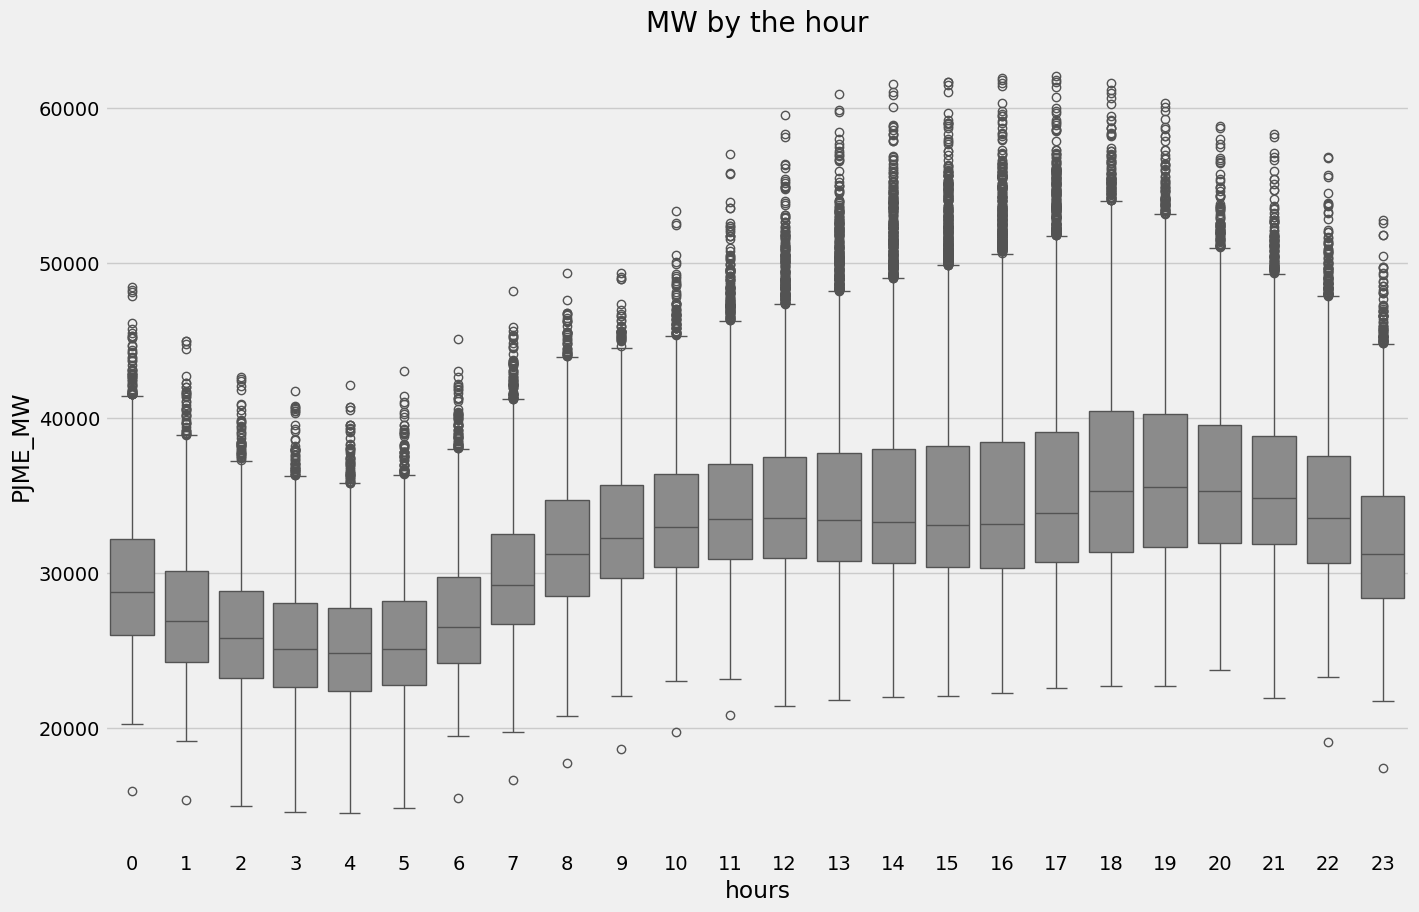

In [110]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df,x='hours',y='PJME_MW',color=col_palete[4])
ax.set_title("MW by the hour")
plt.show()

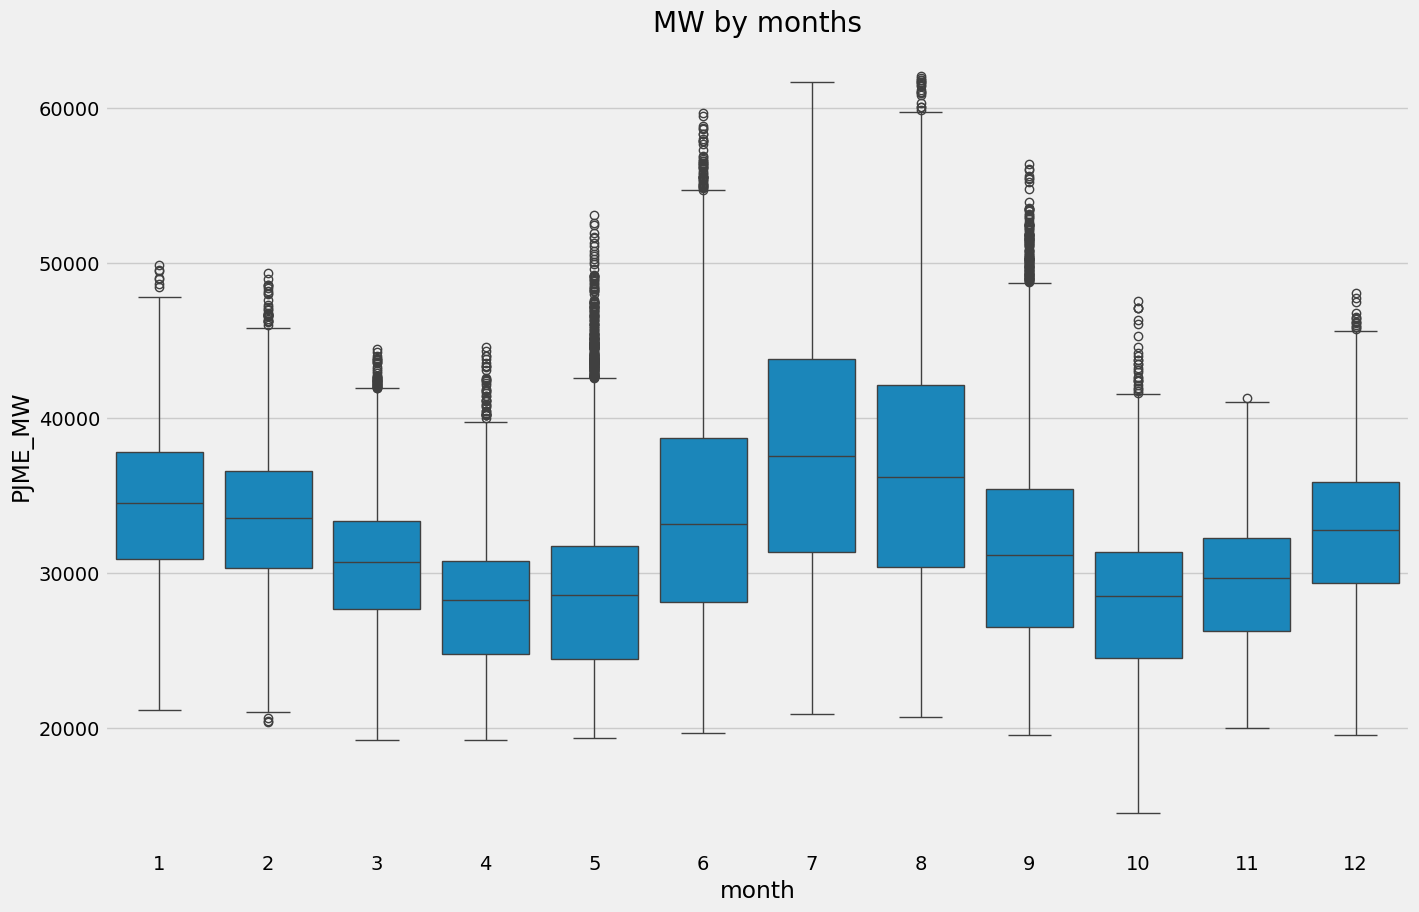

In [111]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df,x='month',y='PJME_MW')
ax.set_title("MW by months")
plt.show()

# Model creation

In [121]:
train = createfeatures(train)
test = createfeatures(test)
features=['hours', 'dayoftheweek', 'month', 'year', 'dayoftheyear']
target = ['PJME_MW']

In [122]:
X_train = train[features]
X_test = test[features]

y_train = train[target]
y_test = test[target]

In [134]:
reg = xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds = 50,learning_rate=0.01)

In [136]:
reg.fit(X_train,y_train,eval_set = [(X_train,y_train),(X_test,y_test)],verbose =100)

[0]	validation_0-rmse:6407.35736	validation_1-rmse:6479.81619
[100]	validation_0-rmse:3911.97994	validation_1-rmse:4312.03224
[200]	validation_0-rmse:3244.38509	validation_1-rmse:3864.56545
[300]	validation_0-rmse:2996.08999	validation_1-rmse:3748.76687
[400]	validation_0-rmse:2830.28024	validation_1-rmse:3744.93340
[417]	validation_0-rmse:2801.66222	validation_1-rmse:3749.26089


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

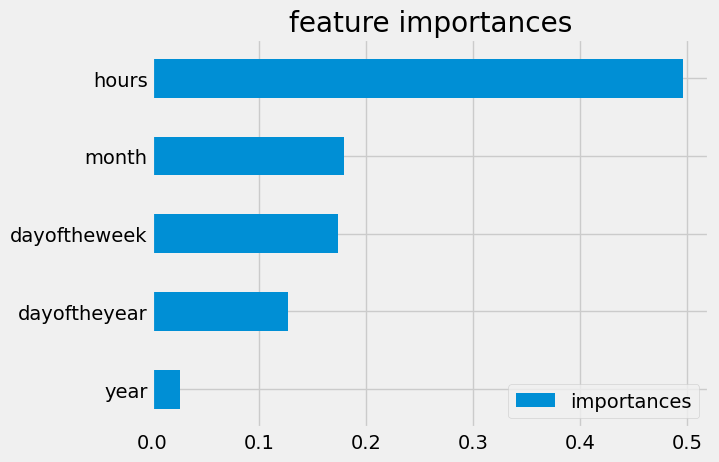

In [150]:
fi = pd.DataFrame(reg.feature_importances_,index=reg.feature_names_in_,columns=['importances'])
fi.sort_values('importances').plot(kind="barh",title="feature importances")
plt.show()

In [151]:
y_pred = reg.predict(X_test)

In [153]:
mse = mean_squared_error(y_test,y_pred)
print(f"the mean squared error is: {np.sqrt(mse)}")

the mean squared error is: 3741.030205705375


In [156]:
test['predictions']= y_pred
test 

,PJME_MW,hours,dayoftheweek,month,year,dayoftheyear,predictions
Datetime,,,,,,,
2015-01-01 00:00:00,32802.0,0,3,1,2015,1,32393.351562
2015-12-31 01:00:00,24305.0,1,3,12,2015,365,29040.167969
2015-12-31 02:00:00,23156.0,2,3,12,2015,365,27877.017578
2015-12-31 03:00:00,22514.0,3,3,12,2015,365,27576.720703
2015-12-31 04:00:00,22330.0,4,3,12,2015,365,27576.720703
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,2018,1,38623.246094
2018-01-01 21:00:00,43751.0,21,0,1,2018,1,38495.484375
2018-01-01 22:00:00,42402.0,22,0,1,2018,1,36229.527344


In [164]:
df = df.merge(y_test[['predictions']],how='left',left_index=True,right_index =True)

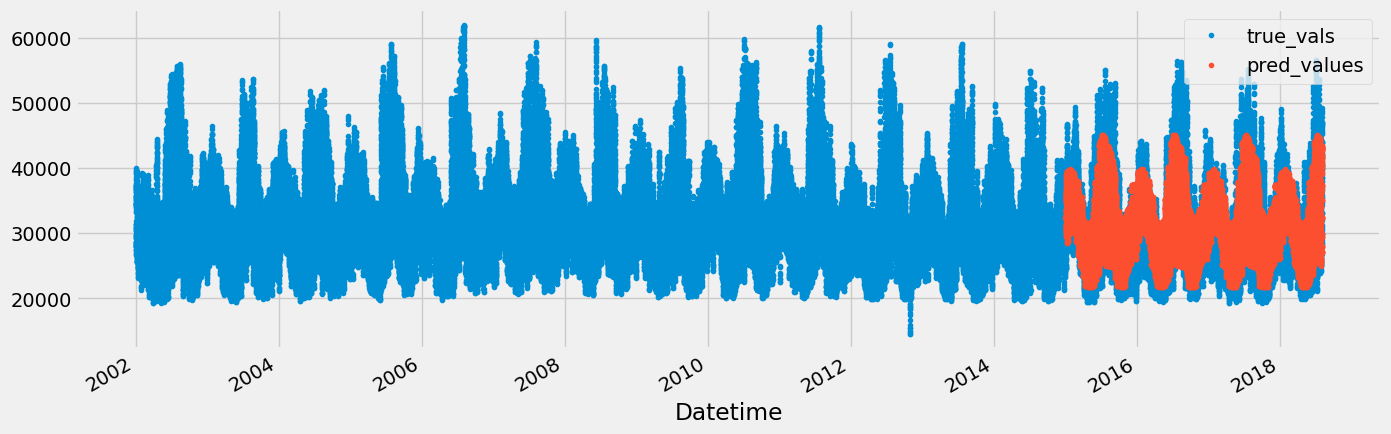

In [167]:
fig,ax = plt.subplots(figsize=(15,5))
df['PJME_MW'].plot(ax=ax,style='.',label="true_vals")
df['predictions'].plot(ax=ax,style='.',label="pred_values")
ax.legend(['true_vals','pred_values'])
plt.show()

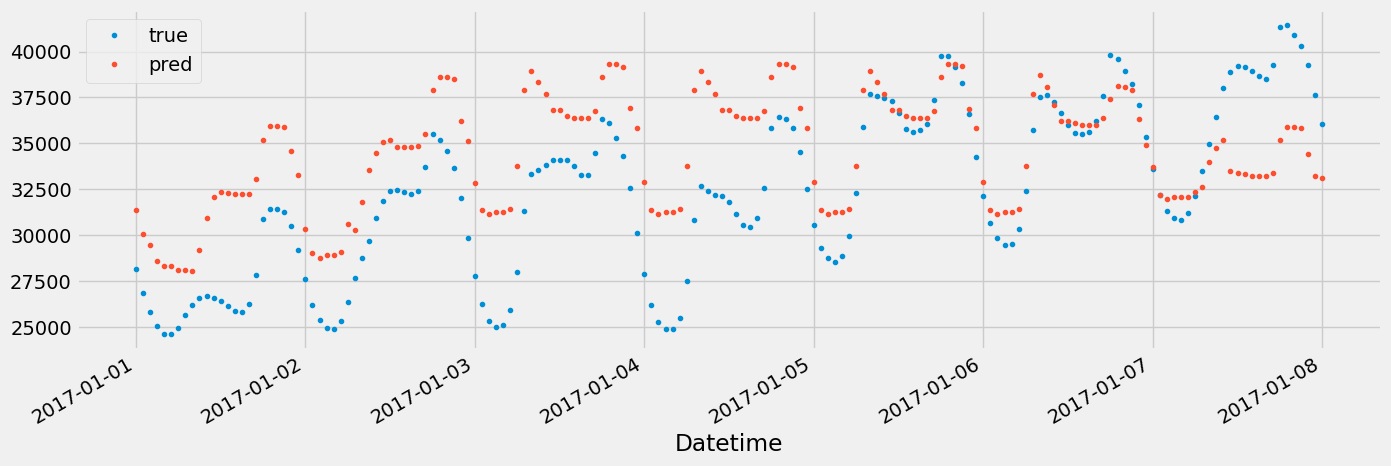

In [173]:
week = df.loc[(df.index >= '2017-01-01')&(df.index <= '2017-01-08')]
fig,ax = plt.subplots(figsize= (15,5))
week['PJME_MW'].plot(ax=ax,style='.',label="true")
week['predictions'].plot(ax=ax,style='.',label="pred")
ax.legend(['true','pred'])
plt.show()

# Error calculation

In [185]:
test['error']= np.abs(test['PJME_MW']-test['predictions'])
test

,PJME_MW,hours,dayoftheweek,month,year,dayoftheyear,predictions,error
Datetime,,,,,,,,
2015-01-01 00:00:00,32802.0,0,3,1,2015,1,32393.351562,408.648438
2015-12-31 01:00:00,24305.0,1,3,12,2015,365,29040.167969,4735.167969
2015-12-31 02:00:00,23156.0,2,3,12,2015,365,27877.017578,4721.017578
2015-12-31 03:00:00,22514.0,3,3,12,2015,365,27576.720703,5062.720703
2015-12-31 04:00:00,22330.0,4,3,12,2015,365,27576.720703,5246.720703
...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,2018,1,38623.246094,5660.753906
2018-01-01 21:00:00,43751.0,21,0,1,2018,1,38495.484375,5255.515625
2018-01-01 22:00:00,42402.0,22,0,1,2018,1,36229.527344,6172.472656


In [189]:
test.sort_values('error')
test['date']=test.index.date
test 

,PJME_MW,hours,dayoftheweek,month,year,dayoftheyear,predictions,error,date
Datetime,,,,,,,,,
2015-01-01 00:00:00,32802.0,0,3,1,2015,1,32393.351562,408.648438,2015-01-01
2015-12-31 01:00:00,24305.0,1,3,12,2015,365,29040.167969,4735.167969,2015-12-31
2015-12-31 02:00:00,23156.0,2,3,12,2015,365,27877.017578,4721.017578,2015-12-31
2015-12-31 03:00:00,22514.0,3,3,12,2015,365,27576.720703,5062.720703,2015-12-31
2015-12-31 04:00:00,22330.0,4,3,12,2015,365,27576.720703,5246.720703,2015-12-31
...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,2018,1,38623.246094,5660.753906,2018-01-01
2018-01-01 21:00:00,43751.0,21,0,1,2018,1,38495.484375,5255.515625,2018-01-01
2018-01-01 22:00:00,42402.0,22,0,1,2018,1,36229.527344,6172.472656,2018-01-01


In [196]:
best= test.groupby('date').mean().sort_values('error',ascending=True).head(5)
best.loc[:,['error']]

,error
date,
2016-12-30,395.436442
2017-10-24,413.885824
2016-10-27,440.053141
2016-04-04,440.223877
2017-05-02,453.738688


In [195]:
worst= test.groupby('date').mean().sort_values('error',ascending=False).head(5)
worst.loc[:,['error']]

,error
date,
2016-08-13,13829.866211
2016-08-14,13577.304362
2016-09-10,11235.855143
2016-09-09,11032.220215
2016-08-12,10667.820312
